In [1]:
import pandas as pd
import numpy as np

C:\Users\Hp\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
athletes=pd.read_csv("athletes.csv")

In [276]:
athletes.shape

(11113, 36)

In [277]:
athletes.sample(5)

,code,current,name,name_short,name_tv,gender,function,country_code,country,country_long,...,family,lang,coach,reason,hero,influence,philosophy,sporting_relatives,ritual,other_sports
4175,1902490,True,BISCH Gwendal,BISCH G,Gwendal BISCH,Male,Athlete,FRA,France,France,...,NaN,French,National: Clemence Monnery (FRA),He was drawn to the spectacular nature of the ...,NaN,NaN,NaN,NaN,NaN,NaN
7332,1940004,True,CLAREBURT Lewis,CLAREBURT L,Lewis CLAREBURT,Male,Athlete,NZL,New Zealand,New Zealand,...,"Father, David. Mother, Robyn. Older sisters Al...",English,NaN,"""My older sisters were both swimmers so I was ...",NaN,"Family. ""Both my sisters were and still are su...",NaN,NaN,"Listens to music before a race. ""I normally bl...",Has been involved in the Surf Life Saving New ...
9899,1967347,True,BANSLEY Heather,BANSLEY H,Heather BANSLEY,Female,Athlete,CAN,Canada,Canada,...,"Father, Doug. Mother, Ann. Brothers, Dave, Mar...",English,National: Srdjan Veckov (SRB),Her university coach recommended beach volleyb...,NaN,University coach Kristine Drakic (CAN),"""Trust the value of joyful laughter on your jo...",NaN,NaN,NaN
4294,1903223,True,HILLEWAERT Lien,HILLEWAERT L,Lien HILLEWAERT,Female,Athlete,BEL,Belgium,Belgium,...,"Sister, Lore",English,Club: Rolo Perez (ARG)<br>National: Raoul Ehre...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4551,1906059,True,JUERISSON Peeter,JUERISSON P,Peeter JUERISSON,Male,Athlete,EST,Estonia,Estonia,...,"Partner, Brigita. Father, Alvar. Mother, Katri...","English, Estonian",National: Peeter Pakk (EST),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [278]:
athletes.drop(columns=['current','name_short', 'name_tv',
       'function', 'country_code', 'country_long', 'nationality',
       'nationality_long', 'nationality_code', 'birth_place', 'birth_country',
       'residence_place', 'residence_country', 'nickname', 'hobbies',
       'occupation', 'family', 'coach', 'reason', 'hero',
       'influence', 'philosophy', 'sporting_relatives', 'ritual',
       'other_sports','education'],inplace=True)

In [279]:
athletes.sample(2)

,code,name,gender,country,height,weight,disciplines,events,birth_date,lang
5139,1913105,McLEOD Carey,Male,Jamaica,180.0,0.0,['Athletics'],"[""Men's Long Jump""]",1998-04-14,English
2238,1572558,AASTEDT Sofia,Female,Sweden,0.0,0.0,['Swimming'],"[""Women's 4 x 100m Freestyle Relay"", 'Relay On...",2003-11-13,NaN


In [280]:
athletes['country'].unique()   #'Armenia', 'Colombia', 'Jamaica', 'Gambia', 'Mexico', 'Comoros','Iraq', 'Djibouti'

array(['Armenia', 'Colombia', 'Jamaica', 'Gambia', 'Mexico', 'Comoros',
       'Iraq', 'Djibouti', 'UA Emirates', 'IR Iran', 'Malawi',
       'Argentina', 'Singapore', 'Malaysia', 'Mauritania', 'Gabon',
       'India', 'Ethiopia', 'St Kitts and Nevis', 'Congo', 'Puerto Rico',
       'Virgin Islands, US', 'Saint Lucia', 'Marshall Islands', 'Jordan',
       'Oman', 'Ghana', 'Libya', 'Algeria', 'Cayman Islands', 'Guyana',
       'AIN', 'StVincent&Grenadines', 'Romania', 'Bahrain',
       "Côte d'Ivoire", 'Uzbekistan', 'Bermuda', 'Luxembourg', 'Morocco',
       'Ireland', 'Kiribati', 'Suriname', 'Aruba', 'Tajikistan',
       'Sao Tome & Principe', 'Croatia', 'Paraguay', 'France', 'Cuba',
       'Kuwait', 'Timor-Leste', 'Japan', 'Yemen', 'Germany', 'Vanuatu',
       'Bhutan', 'Bangladesh', 'Cambodia', 'Afghanistan', 'Lesotho',
       'Israel', 'Eswatini', 'Great Britain', 'Turkmenistan', 'Sweden',
       'Ukraine', 'Vietnam', 'Mozambique', 'Chinese Taipei', 'Italy',
       'Mali', 'Georgia'

In [281]:
athletes_list=athletes['lang'].dropna().astype(str).values.tolist()

In [282]:
lang_string=" ".join(athletes_list)

In [283]:
lang_string=lang_string.replace(",","")

In [284]:
lang_string=lang_string.replace("/","")

In [285]:
lang_string=lang_string.replace(".","")

In [286]:
lang_string=lang_string.replace("(studying)","")

In [287]:
lang_list=lang_string.split(" ")

In [288]:

from collections import Counter

In [289]:
lang_freq=pd.DataFrame(Counter(lang_list).items())

In [290]:
lang_freq[0]=lang_freq.apply(lambda x: 'Other' if x[1] < 150 else x[0],axis=1)

In [291]:
lang_freq=lang_freq.groupby(0, as_index=False)[1].sum()

In [306]:
# lang_freq=lang_freq.sort_values(by=1,ascending=False).reset_index(drop=True)
a=pd.DataFrame(Counter(lang_list).most_common(10))
a.index+=1
a

,0,1
1,English,6174
2,Spanish,1370
3,French,1243
4,German,818
5,Italian,519
6,Mandarin,494
7,Japanese,440
8,Portuguese,416
9,Russian,408
10,Dutch,401


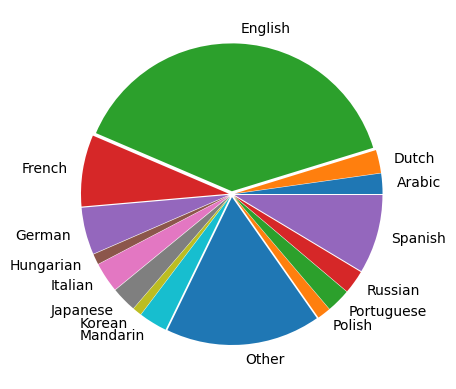

In [293]:
import matplotlib.pyplot as plt
plt.pie(lang_freq[1],labels=lang_freq[0],explode=[0.02 for i in range(lang_freq.shape[0]) ])
plt.show()

In [294]:
athletes[athletes['code']==1897155]

,code,name,gender,country,height,weight,disciplines,events,birth_date,lang
3635,1897155,RYBACHOK Anastasiia,Female,Ukraine,0.0,0.0,['Canoe Sprint'],"[""Women's Canoe Single 200m"", ""Women's Canoe D...",1998-04-13,"English, Russian, Ukrainian"


## creating a new column name "age"

In [295]:
from datetime import datetime

In [296]:
athletes['birth_date']=athletes['birth_date'].astype('datetime64[ns]')
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   code         11113 non-null  int64         
 1   name         11113 non-null  object        
 2   gender       11113 non-null  object        
 3   country      11113 non-null  object        
 4   height       11110 non-null  float64       
 5   weight       11108 non-null  float64       
 6   disciplines  11113 non-null  object        
 7   events       11113 non-null  object        
 8   birth_date   11113 non-null  datetime64[ns]
 9   lang         10605 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 868.3+ KB


In [297]:
print(athletes["birth_date"][0].date())

1991-10-21


In [298]:
athletes['age']=athletes.apply(lambda x: datetime.now().year-x["birth_date"].year,axis = 1)

In [300]:
athletes['age'].mean()

26.9678754611716

## Merging with medals

In [3]:
import ast

In [4]:
athletes.dropna(subset=['events'],inplace=True)

In [5]:
def clean_and_convert(value):
    try:
        value = value.replace("'", "") 
        value = value.replace('"', '') 
        value = value.replace('[', '["')  
        value = value.replace(']', '"]')  
        value = value.replace(',', '","')  
        return ast.literal_eval(value)
    except (ValueError, SyntaxError, TypeError):
        return value 

In [6]:
athletes['disciplines'] = athletes['disciplines'].apply(clean_and_convert)
athletes['events']=athletes['events'].apply(clean_and_convert)

In [7]:
athletes=athletes.explode(column=['events']).reset_index(drop=True)

In [8]:
athletes=athletes.explode(column=['disciplines']).reset_index(drop=True)

In [9]:
athletes['disciplines']=athletes['disciplines'].apply(lambda x: x.strip())

In [10]:
athletes['events']=athletes['events'].apply(lambda x: x.strip())

In [13]:
athletes.drop(columns=['code', 'current', 'name_short', 'name_tv',
       'function', 'country_code', 'country_long', 'nationality',
       'nationality_long', 'nationality_code', 'height', 'weight',
        'birth_date', 'birth_place', 'birth_country',
       'residence_place', 'residence_country', 'nickname', 'hobbies',
       'occupation', 'education', 'family', 'lang', 'coach', 'reason', 'hero',
       'influence', 'philosophy', 'sporting_relatives', 'ritual',
       'other_sports'],inplace=True)

In [15]:
athletes.to_csv("filtered_athlete.csv")

In [38]:
medals=pd.read_csv("medals.csv")

In [39]:
medals.isnull().sum()

medal_type      0
medal_code      1
medal_date      0
name            0
gender          0
discipline      0
event           0
event_type      0
url_event       9
code            0
country_code    0
country         0
country_long    0
dtype: int64

In [40]:
medals['event']=medals['event'].apply(lambda x: x.replace("'",""))

In [42]:
medals['discipline']=medals['discipline'].apply(lambda x: x.strip())
medals['event']=medals['event'].apply(lambda x: x.strip())

In [43]:
medals.drop(columns=['medal_code', 'medal_date', 'name', 'gender', 'event_type', 'url_event',
       'country_code', 'country', 'country_long'],inplace=True)

In [44]:
athletes['code']=athletes['code'].astype(str)

In [45]:
athletes.shape

(15033, 11)

In [46]:
new_df=pd.merge(athletes,medals, left_on=["code","events","disciplines"],right_on=["code","event","discipline"],how="left")

In [47]:
new_df.drop(columns=['birth_date','lang','height','weight'],inplace=True)

In [48]:
new_df.rename(columns={
    "name_x":"name",
    "gender_x":"gender",
    "country_x": "country"
},inplace=True)

In [50]:
new_df.sample(4)

,code,name,gender,country,disciplines,events,age,medal_type,discipline,event
12450,1959861,BILES Simone,Female,United States,Artistic Gymnastics,Womens Vault,27,Gold Medal,Artistic Gymnastics,Womens Vault
5131,1899130,NIN REYES Audrys,Male,Dominican Republic,Artistic Gymnastics,Mens Horizontal Bar,29,NaN,NaN,NaN
1347,1552175,POLINARI Anna,Female,Italy,Athletics,4 x 400m Relay Mixed,25,NaN,NaN,NaN
2709,1569965,DEMIREL Muhammed,Male,Türkiye,Judo,Men -66 kg,22,NaN,NaN,NaN


In [51]:
new_df[new_df['code']=="1897155"]

,code,name,gender,country,disciplines,events,age,medal_type,discipline,event
4812,1897155,RYBACHOK Anastasiia,Female,Ukraine,Canoe Sprint,Womens Canoe Single 200m,26,NaN,NaN,NaN
4813,1897155,RYBACHOK Anastasiia,Female,Ukraine,Canoe Sprint,Womens Canoe Double 500m,26,NaN,NaN,NaN


## Merging with team

In [52]:
teams=pd.read_csv('teams.csv')

In [53]:
teams['events']=teams['events'].astype(str)

In [54]:
teams['events']=teams['events'].apply(lambda x: x.replace("'",""))

In [56]:
teams.rename(columns={
    'events':'event'
},inplace=True)

In [57]:
teams.drop(columns=[
    'current','team','team_gender','country_code','country_long','disciplines_code','athletes','coaches_codes',
    'num_coaches','coaches'
],inplace=True)

In [58]:
teams['discipline']=teams['discipline'].apply(lambda x: x.strip())
teams['event']=teams['event'].apply(lambda x: x.strip())

In [59]:
medals.sample(4)

,medal_type,discipline,event,code
396,Silver Medal,Judo,Mixed Team,JUDXTEAM6---JPN01
577,Bronze Medal,Athletics,Mens 1500m,1965327
312,Bronze Medal,Judo,Women +78 kg,1928070
110,Silver Medal,Judo,Men -73 kg,1891311


In [60]:
teams.sample(4)

,code,country,discipline,event,athletes_codes,num_athletes
586,GRYW5AA-----EGY01,Egypt,Rhythmic Gymnastics,Group All-Around,"['1562782', '1562596', '1562222', '1978541', '...",5.0
1534,TENXDOUBLES-GRE01,Greece,Tennis,Mixed Doubles,"['1961362', '1961363']",2.0
239,BKBWTEAM5---GER01,Germany,Basketball,Women,"['1898822', '1898808', '1898849', '1898830', '...",12.0
351,CTRMPURTEAM4FRA01,France,Cycling Track,Mens Team Pursuit,"['1895647', '1895663', '1895716', '1895717', '...",5.0


In [65]:
# medals.info()

In [66]:
teams_medals = pd.merge(teams,medals,on=["code","discipline",'event'],how="inner")

In [67]:
teams_medals

,code,country,discipline,event,athletes_codes,num_athletes,medal_type
0,ARCMTEAM3---FRA01,France,Archery,Mens Team,"['1541270', '1541272', '1541275']",3.0,Silver Medal
1,ARCMTEAM3---KOR01,Korea,Archery,Mens Team,"['1902130', '1902135', '1902144']",3.0,Gold Medal
2,ARCMTEAM3---TUR01,Türkiye,Archery,Mens Team,"['1565000', '1565002', '1565006']",3.0,Bronze Medal
3,ARCWTEAM3---CHN01,China,Archery,Womens Team,"['1913382', '1913372', '1913380']",3.0,Silver Medal
4,ARCWTEAM3---KOR01,Korea,Archery,Womens Team,"['1902121', '1902147', '1902148']",3.0,Gold Medal
...,...,...,...,...,...,...,...
279,WPOMTEAM7---SRB01,Serbia,Water Polo,Men,"['1956434', '1956444', '1956459', '1956456', '...",13.0,Gold Medal
280,WPOMTEAM7---USA01,United States,Water Polo,Men,"['1908370', '1908360', '1908369', '1908365', '...",13.0,Bronze Medal
281,WPOWTEAM7---AUS01,Australia,Water Polo,Women,"['1947514', '1947523', '1947513', '1947506', '...",13.0,Silver Medal
282,WPOWTEAM7---ESP01,Spain,Water Polo,Women,"['1954878', '1954897', '1954877', '1954893', '...",13.0,Gold Medal


In [68]:
teams_medals['athletes_codes']=teams_medals['athletes_codes'].apply(ast.literal_eval)

In [69]:
teams_medals['athletes_codes'][1]

['1902130', '1902135', '1902144']

In [70]:
teams_medals=teams_medals.explode('athletes_codes').reset_index(drop = True)

In [71]:
teams_medals.shape

(1555, 7)

In [72]:
teams_medals.rename(columns={
    "code":"team_code",
    "athletes_codes":"code",
    "medal_type":"team_medal"
},inplace=True)
teams_medals.sample(3)

,team_code,country,discipline,event,code,num_athletes,team_medal
1248,SWMM4X200MFRUSA01,United States,Swimming,Mens 4 x 200m Freestyle Relay,1935911,7.0,Silver Medal
65,ATHW4X100M--GBR01,Great Britain,Athletics,Womens 4 x 100m Relay,1924460,6.0,Silver Medal
696,HBLMTEAM7---GER01,Germany,Handball,Men,1899206,16.0,Silver Medal


## Making Final DF

In [73]:
new_df.drop(columns=['discipline','event'],inplace=True)

In [75]:
new_df.rename(columns={
    "disciplines":"discipline",
    "events":"event"
},inplace=True)

In [76]:
new_df

,code,name,gender,country,discipline,event,age,medal_type
0,1532872,ALEKSANYAN Artur,Male,Armenia,Wrestling,Mens Greco-Roman 97kg,33,Silver Medal
1,1532873,AMOYAN Malkhas,Male,Armenia,Wrestling,Mens Greco-Roman 77kg,25,Bronze Medal
2,1532874,GALSTYAN Slavik,Male,Armenia,Wrestling,Mens Greco-Roman 67kg,28,NaN
3,1532944,HARUTYUNYAN Arsen,Male,Armenia,Wrestling,Mens Freestyle 57kg,25,NaN
4,1532945,TEVANYAN Vazgen,Male,Armenia,Wrestling,Mens Freestyle 65kg,25,NaN
...,...,...,...,...,...,...,...,...
15028,4986655,ADA ETO Sefora,Female,Equatorial Guinea,Athletics,Womens 100m,21,NaN
15029,9460001,LIUZZI Emanuela,Female,Italy,Wrestling,Womens Freestyle 50kg,24,NaN
15030,1972077,BOERS Isayah,Male,Netherlands,Athletics,4 x 400m Relay Mixed,25,NaN
15031,1899865,STAUT Kevin,Male,France,Equestrian,Jumping Team,44,NaN


In [77]:
new_df['discipline']=new_df['discipline'].apply(lambda x: x.strip())
new_df['event']=new_df['event'].apply(lambda x: x.strip())

In [78]:
teams_medals[teams_medals['team_code']=="CSPWC2-500M-UKR01"]     #1897155

,team_code,country,discipline,event,code,num_athletes,team_medal
270,CSPWC2-500M-UKR01,Ukraine,Canoe Sprint,Womens Canoe Double 500m,1897153,2.0,Silver Medal
271,CSPWC2-500M-UKR01,Ukraine,Canoe Sprint,Womens Canoe Double 500m,1897155,2.0,Silver Medal


In [79]:
new_df[new_df['code']=='1897155']

,code,name,gender,country,discipline,event,age,medal_type
4812,1897155,RYBACHOK Anastasiia,Female,Ukraine,Canoe Sprint,Womens Canoe Single 200m,26,NaN
4813,1897155,RYBACHOK Anastasiia,Female,Ukraine,Canoe Sprint,Womens Canoe Double 500m,26,NaN


In [233]:
final_df=pd.merge(new_df,teams_medals, on=['code','event','discipline'],how="left")

In [234]:
final_df[final_df['code']=='1897155']

,code,name,gender,country_x,discipline,event,age,medal_type,team_code,country_y,num_athletes,team_medal
4812,1897155,RYBACHOK Anastasiia,Female,Ukraine,Canoe Sprint,Womens Canoe Single 200m,26,NaN,NaN,NaN,NaN,NaN
4813,1897155,RYBACHOK Anastasiia,Female,Ukraine,Canoe Sprint,Womens Canoe Double 500m,26,NaN,CSPWC2-500M-UKR01,Ukraine,2.0,Silver Medal


In [235]:
final_df.shape

(15033, 12)

In [236]:
final_df.sample(4)

,code,name,gender,country_x,discipline,event,age,medal_type,team_code,country_y,num_athletes,team_medal
281,1537349,ALSADEQ Julyana,Female,Jordan,Taekwondo,Women -67kg,30,NaN,NaN,NaN,NaN,NaN
11758,1954207,SCHNELL Delaney,Female,United States,Diving,Womens 10m Platform,26,NaN,NaN,NaN,NaN,NaN
2087,1563494,RUZIEV Doston,Male,Uzbekistan,Judo,Mixed Team,28,NaN,NaN,NaN,NaN,NaN
12067,1955461,PARRIS Mason Mark,Male,United States,Wrestling,Mens Freestyle 125kg,25,NaN,NaN,NaN,NaN,NaN


In [237]:
final_df.drop(columns=['country_y'],inplace=True)

In [238]:
final_df.isnull().sum()

code                0
name                0
gender              0
country_x           0
discipline          0
event               0
age                 0
medal_type      14279
team_code       13492
num_athletes    13492
team_medal      13492
dtype: int64

In [239]:
final_df['medal_type']=final_df['team_medal'].combine_first(final_df['medal_type'])

In [240]:
final_df.isnull().sum()

code                0
name                0
gender              0
country_x           0
discipline          0
event               0
age                 0
medal_type      12738
team_code       13492
num_athletes    13492
team_medal      13492
dtype: int64

In [241]:
final_df.drop(columns=['team_medal'],inplace=True)

In [242]:
final_df.shape

(15033, 10)

In [243]:
final_df.dropna(subset=["medal_type"],inplace=True)

In [244]:
final_df.shape

(2295, 10)

In [245]:
final_df[final_df['team_code']=="CSPWC2-500M-UKR01"]

,code,name,gender,country_x,discipline,event,age,medal_type,team_code,num_athletes
4811,1897153,LUZAN Liudmyla,Female,Ukraine,Canoe Sprint,Womens Canoe Double 500m,27,Silver Medal,CSPWC2-500M-UKR01,2.0
4813,1897155,RYBACHOK Anastasiia,Female,Ukraine,Canoe Sprint,Womens Canoe Double 500m,26,Silver Medal,CSPWC2-500M-UKR01,2.0


In [248]:
# import pickle
# with open("final_df.csv","wb") as file:
#     pickle.dump(final_df,file)

In [250]:
final_df.to_csv("final2_df.csv")

In [228]:
final_df.duplicated(subset=["team_code","discipline",'event','medal_type','country_x']).sum()

1260

In [229]:
final_df.shape

(2295, 10)

In [230]:
final_df.drop_duplicates(subset=["team_code","discipline",'event','medal_type','country_x'],inplace=True)

In [231]:
final_df[final_df['country_x']=="India"]

,code,name,gender,country_x,discipline,event,age,medal_type,team_code,num_athletes
316,1538084,KUSALE Swapnil,Male,India,Shooting,50m Rifle 3 Positions Men,29,Bronze Medal,NaN,NaN
333,1538159,BHAKER Manu,Female,India,Shooting,10m Air Pistol Women,22,Bronze Medal,NaN,NaN
335,1538159,BHAKER Manu,Female,India,Shooting,10m Air Pistol Mixed Team,22,Bronze Medal,SHOXAPMT----IND01,2.0
682,1543015,PARATTU RAVEENDRAN Sreejesh,Male,India,Hockey,Men,36,Bronze Medal,HOCMTEAM11--IND01,16.0
1141,1550250,CHOPRA Neeraj,Male,India,Athletics,Mens Javelin Throw,27,Silver Medal,NaN,NaN
8965,1931496,AMAN Aman,Male,India,Wrestling,Mens Freestyle 57kg,21,Bronze Medal,NaN,NaN


In [312]:
final_df[final_df['country_x']=="Pakistan"]

,code,name,gender,country_x,discipline,event,age,medal_type,team_code,num_athletes
3224,1878563,NADEEM Arshad,Male,Pakistan,Athletics,Mens Javelin Throw,27,Gold Medal,NaN,NaN


In [207]:
final_df['country_x'].value_counts().to_dict()

{'United States': 124,
 'China': 91,
 'France': 64,
 'Great Britain': 64,
 'Australia': 53,
 'Japan': 45,
 'Italy': 39,
 'Netherlands': 33,
 'Korea': 32,
 'Germany': 32,
 'Canada': 27,
 'New Zealand': 20,
 'Brazil': 20,
 'Hungary': 19,
 'Spain': 18,
 'Uzbekistan': 13,
 'IR Iran': 12,
 'Ukraine': 12,
 'Sweden': 11,
 'Kenya': 10,
 'Belgium': 10,
 'Poland': 10,
 'Romania': 9,
 'Cuba': 9,
 'Denmark': 9,
 'Türkiye': 8,
 'Greece': 8,
 'Norway': 8,
 'Switzerland': 8,
 'Chinese Taipei': 7,
 'Kazakhstan': 7,
 'Croatia': 7,
 'Israel': 7,
 'Bulgaria': 7,
 'Georgia': 7,
 'Azerbaijan': 7,
 'Ireland': 7,
 'South Africa': 6,
 'Thailand': 6,
 'DPR Korea': 6,
 'Jamaica': 6,
 'Kyrgyzstan': 6,
 'India': 6,
 'Czechia': 5,
 'Mexico': 5,
 'Ecuador': 5,
 'AIN': 5,
 'Austria': 5,
 'Serbia': 5,
 'Hong Kong, China': 4,
 'Portugal': 4,
 'Philippines': 4,
 'Lithuania': 4,
 'Armenia': 4,
 'Republic of Moldova': 4,
 'Colombia': 4,
 'Bahrain': 4,
 'Argentina': 3,
 'Indonesia': 3,
 'Tunisia': 3,
 'Egypt': 3,
 'Algeri

In [209]:
final_df_copy = final_df.copy()

In [211]:
final_df.sample(3)

,code,name,gender,country_x,discipline,event,age,medal_type,team_code,num_athletes
738,1543317,DOYLE Phili,Male,Ireland,Rowing,Mens Double Sculls,32,Bronze Medal,ROWMSCULL2--IRL01,2.0
5942,1904430,HALES Nathan,Male,Great Britain,Shooting,Trap Men,28,Gold Medal,NaN,NaN
5026,1898250,INGEBRIGTSEN Jakob,Male,Norway,Athletics,Mens 5000m,24,Gold Medal,NaN,NaN


## Sport wise analysis

In [212]:
swimming=pd.read_csv("results\Swimming.csv")

In [214]:
swimming['event_name'].value_counts()

event_name
Women's 50m Freestyle               103
Men's 100m Freestyle                103
Men's 50m Freestyle                  98
Men's 100m Backstroke                70
Men's 100m Butterfly                 64
Men's 100m Breaststroke              62
Women's 100m Breaststroke            61
Women's 100m Backstroke              60
Women's 200m Individual Medley       58
Women's 100m Butterfly               56
Women's 200m Freestyle               55
Men's 200m Backstroke                54
Women's 100m Freestyle               53
Men's 200m Freestyle                 52
Men's 200m Butterfly                 52
Women's 200m Backstroke              51
Men's 200m Individual Medley         49
Men's 200m Breaststroke              49
Women's 200m Breaststroke            47
Men's 400m Freestyle                 45
Women's 200m Butterfly               43
Men's 800m Freestyle                 39
Men's 1500m Freestyle                35
Women's 400m Freestyle               29
Women's 1500m Freestyle      